# Module 6: Descriptive statistics and Data visualization

Last week, we learned about the basics of working with pandas and data cleaning process. In today's module, we will continue to work with pandas for descriptive analysis and we will introduce data visualization using python tools, to help answer some interesting policy questions.   

Python data visualization tool landscape:

  - [matplotlib](https://matplotlib.org/api/api_overview.html) is powerful but unwieldy; good for basic plotting (scatter, line, bar), and pandas can use it [directly](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
  - [seaborn](http://seaborn.pydata.org/) (built on top of matplotlib) is best for statistical visualization: summarizing data, understanding distributions, searching for patterns and trends

We will introduce **matplotlib** and **seaborn** in this class. **seaborn** is the easiest to work with to produce meaningful and aesthetically-pleasing visuals, so we will focus on this in this module.

Readings: Python for Data Analysis Chapter 9-10

## Income inequality and poverty in US cities

Income inequality has been a growing concern of policymakers at the national and sub-national level in the US. We are going to explore this topic with a metropolitan level dataset. Income inequality can be measured in differet ways. Gini index is the most used measurement of income inequality and wealth concentration. The income Gini index represents the relative dispersion of income across the entire income distribution of a population. Its value often ranges from zero to one, with zero represents perfect equality and one represents complete inequality. Other measures such as income gap ratios can be used to capture inequality at different points of income distribution.



##### Table 1: Variables and Sources 
|variable | content | source |
|---- | --- | --- |
|hhinc_10prct | household income at the bottom 10th percentile | IPUMS ACS |
|hhinc_20prct | household income at the bottom 20th percentile  | IPUMS ACS |
|hhinc_50prct | household income at the median percentile (median household income) | IPUMS ACS |
|hhinc_80prct | household income at the top 80th percentile  | IPUMS ACS |
|hhinc_90prct | household income at the top 90th percentile | IPUMS ACS |
|hhinc_99prct | household income at the top 99th percentile  | IPUMS ACS |
|gini | household income gini index  | IPUMS ACS |
|poverty_rate | poverty rate | ACS |
|tot_pop | total population size | ACS |
|black_alonerate | Percent of population that is Black/African American | ACS |
|hispanic_anyrate | Percent of population that is Hispanic/Latino | ACS |
|asian_alonerate | Percent of population that is Aisan | ACS |
|gdp_percap | GDP per capita | ACS |
|bachelor_prct | Percent of population (25 years and older) with bachelor’s degree or higher | ACS |
|unemp_rate| unemployment rate | ACS |


Reference: 
- Brookings, 2016, [City and metropolitan income inequality data reveal ups and downs through 2016](https://www.brookings.edu/research/city-and-metropolitan-income-inequality-data-reveal-ups-and-downs-through-2016/)
- US Census Bureau, 2017, [Income Inequality among Regions and Metropolitan Statistical Areas: 2005 to 2015](https://www.census.gov/library/working-papers/2017/demo/SESHD-WP2017-41.html)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Load and prep the data (review)

In [2]:
df = pd.read_csv('../data/hhincome_msa_05_15.csv', dtype={'msacode':str})
df.shape

(2868, 19)

In [3]:
df.dtypes

Unnamed: 0            int64
year                float64
msacode              object
msatitle             object
hhinc_10prct        float64
hhinc_20prct        float64
hhinc_50prct        float64
hhinc_80prct        float64
hhinc_90prct        float64
hhinc_99prct        float64
gini                float64
poverty_rate        float64
tot_pop             float64
black_alonerate     float64
hispanic_anyrate    float64
asian_alonerate     float64
gdp_percap          float64
bachelor_prct       float64
unemp_rate          float64
dtype: object

In [4]:
# drop non useful column
df = df.drop(columns=['Unnamed: 0'])
df.columns

Index(['year', 'msacode', 'msatitle', 'hhinc_10prct', 'hhinc_20prct',
       'hhinc_50prct', 'hhinc_80prct', 'hhinc_90prct', 'hhinc_99prct', 'gini',
       'poverty_rate', 'tot_pop', 'black_alonerate', 'hispanic_anyrate',
       'asian_alonerate', 'gdp_percap', 'bachelor_prct', 'unemp_rate'],
      dtype='object')

In [5]:
df.isnull().any()

year                 True
msacode             False
msatitle            False
hhinc_10prct         True
hhinc_20prct         True
hhinc_50prct         True
hhinc_80prct         True
hhinc_90prct         True
hhinc_99prct         True
gini                 True
poverty_rate         True
tot_pop              True
black_alonerate      True
hispanic_anyrate     True
asian_alonerate      True
gdp_percap           True
bachelor_prct        True
unemp_rate           True
dtype: bool

In [6]:
# check if there is any null values
df.loc[:, df.isnull().any()]

,year,hhinc_10prct,hhinc_20prct,hhinc_50prct,hhinc_80prct,hhinc_90prct,hhinc_99prct,gini,poverty_rate,tot_pop,black_alonerate,hispanic_anyrate,asian_alonerate,gdp_percap,bachelor_prct,unemp_rate
0,2005.0,12660.797660,24251.30834,53268.58439,102868.6628,136203.5552,389212.6040,0.438907,0.114431,702498.0,0.112832,0.009905,0.015627,33626.650,28.1,0.058921
1,2005.0,16644.475680,30037.74834,63586.82132,115529.8013,150875.1161,323417.4955,0.411460,0.104639,854604.0,0.060835,0.027031,0.025866,36266.832,30.9,0.039713
2,2005.0,13377.134890,23105.96026,53421.05459,104584.8728,141067.9679,340352.5264,0.439557,0.143484,809551.0,0.023933,0.420205,0.016659,33338.477,30.0,0.048233
3,2005.0,8755.942837,14593.23806,42563.61101,87956.2228,115895.6898,305504.0992,0.479098,0.210208,147930.0,0.269229,0.016812,0.008051,24161.326,19.0,0.061756
4,2005.0,16052.561870,27493.79563,60805.15859,115529.8013,158823.0742,385504.7055,0.420462,0.086792,787738.0,0.034279,0.093720,0.021369,35324.184,25.0,0.048813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2866,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# we can drop columns with no data
df = df.dropna()

In [8]:
# change year data type to int
df['year'] = df['year'].astype(int)

In [9]:
### let's calculate new variables columns for household income gap ratios
df['hhinc_90_10'] = df['hhinc_90prct'] / df['hhinc_10prct'] ## 90/10 income ratio
df['hhinc_80_20'] = df['hhinc_80prct'] / df['hhinc_20prct'] ## 80/20 income ratio
df['hhinc_50_10'] = df['hhinc_50prct'] / df['hhinc_10prct'] ## 50/10 income ratio
df['hhinc_90_50'] = df['hhinc_90prct'] / df['hhinc_50prct'] ## 90/50 income ratio

## 2. Descriptive stats

### Q1: Can you rank the top and bottom 10 metropolitan areas (MSAs) that have the highest, lowest median household income in 2015?

In [10]:
# use the describe() method to pull basic descriptive stats for the median income column
df['hhinc_50prct'].describe()

count      2776.000000
mean      53546.664254
std       10149.434018
min       32726.120050
25%       46328.801770
50%       51730.627080
75%       58938.728053
max      110000.000000
Name: hhinc_50prct, dtype: float64

#### Or if you need the value of a single stat, call it directly

Key measures of central tendency: mean and median

In [11]:
# the mean, or "average" value
df['hhinc_50prct'].mean()

53546.664253667295

In [12]:
# the median, or "typical" (ie, 50th percentile) value
df['hhinc_50prct'].median()

51730.62708

Key measures of dispersion or variability: range, IQR, variance, standard deviation

In [13]:
df['hhinc_50prct'].min()

32726.12005

In [14]:
df['hhinc_50prct'].max()

110000.0

In [15]:
# let's set index
df = df.reset_index().set_index(['year', 'msacode', 'msatitle']).sort_index()
df.head()

index  hhinc_10prct  \
year msacode msatitle                                                 
2005 10420   Akron, OH                              0  12660.797660   
     10580   Albany-Schenectady-Troy, NY            1  16644.475680   
     10740   Albuquerque, NM                        2  13377.134890   
     10780   Alexandria, LA                         3   8755.942837   
     10900   Allentown-Bethlehem-Easton, PA-NJ      4  16052.561870   

                                                hhinc_20prct  hhinc_50prct  \
year msacode msatitle                                                        
2005 10420   Akron, OH                           24251.30834   53268.58439   
     10580   Albany-Schenectady-Troy, NY         30037.74834   63586.82132   
     10740   Albuquerque, NM                     23105.96026   53421.05459   
     10780   Alexandria, LA                      14593.23806   42563.61101   
     10900   Allentown-Bethlehem-Easton, PA-NJ   27493.79563   60805.15859   

                                                hhinc_80prct  hhinc_90prct  \
year msacode msatitle                                                        
2005 10420   Akron, OH                           102868.6628   136203.5552   
     10580   Albany-Schenectady-Troy, NY         115529.8013   150875.1161   
     10740   Albuquerque, NM                     104584.8728   141067.9679   
     10780   Alexandria, LA                       87956.2228   115895.6898   
     10900   Allentown-Bethlehem-Easton, PA-NJ   115529.8013   158823.0742   

                                                hhinc_99prct      gini  \
year msacode msatitle                                                    
2005 10420   Akron, OH                           389212.6040  0.438907   
     10580   Albany-Schenectady-Troy, NY         323417.4955  0.411460   
     10740   Albuquerque, NM                     340352.5264  0.439557   
     10780   Alexandria, LA                      305504.0992  0.479098   
     10900   Allentown-Bethlehem-Easton, PA-NJ   385504.7055  0.420462   

                                                poverty_rate   tot_pop  \
year msacode msatitle                                                    
2005 10420   Akron, OH                              0.114431  702498.0   
     10580   Albany-Schenectady-Troy, NY            0.104639  854604.0   
     10740   Albuquerque, NM                        0.143484  809551.0   
     10780   Alexandria, LA                         0.210208  147930.0   
     10900   Allentown-Bethlehem-Easton, PA-NJ      0.086792  787738.0   

                                                black_alonerate  \
year msacode msatitle                                             
2005 10420   Akron, OH                                 0.112832   
     10580   Albany-Schenectady-Troy, NY               0.060835   
     10740   Albuquerque, NM                           0.023933   
     10780   Alexandria, LA                            0.269229   
     10900   Allentown-Bethlehem-Easton, PA-NJ         0.034279   

                                                hispanic_anyrate  \
year msacode msatitle                                              
2005 10420   Akron, OH                                  0.009905   
     10580   Albany-Schenectady-Troy, NY                0.027031   
     10740   Albuquerque, NM                            0.420205   
     10780   Alexandria, LA                             0.016812   
     10900   Allentown-Bethlehem-Easton, PA-NJ          0.093720   

                                                asian_alonerate  gdp_percap  \
year msacode msatitle                                                         
2005 10420   Akron, OH                                 0.015627   33626.650   
     10580   Albany-Schenectady-Troy, NY               0.025866   36266.832   
     10740   Albuquerque, NM                           0.016659   33338.477   
     10780   Alexandria, LA                            0.008051   24161.326 

In [16]:
# top 5 msas that have the highest meidian household income in 2015
df.loc[2015][['hhinc_50prct']].sort_values(by='hhinc_50prct', ascending=False).head(5).round(3)

,,hhinc_50prct
msacode,msatitle,
41940,"San Jose-Sunnyvale-Santa Clara, CA",110000.000
41860,"San Francisco-Oakland-Hayward, CA",96000.000
47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",95000.000
14860,"Bridgeport-Stamford-Norwalk, CT",89454.059
14460,"Boston-Cambridge-Newton, MA-NH",82000.000


In [17]:
# now your turn to try
# can you do the bottom 10 msas that have the highest meidian household income in 2015?


## 3. Visualizing distributions


## Q2: Let's plot a bar chart of the top 10 metros by household median income in 2015

### Bar charts

We will use matplotlib for this example


In [18]:
# top 10 msa that have the highest meidian household income in 2015
df_top10 = df.loc[2015][['hhinc_50prct']].sort_values(by='hhinc_50prct', ascending=False).head(10).round(3)
df_top10

,,hhinc_50prct
msacode,msatitle,
41940,"San Jose-Sunnyvale-Santa Clara, CA",110000.000
41860,"San Francisco-Oakland-Hayward, CA",96000.000
47900,"Washington-Arlington-Alexandria, DC-VA-MD-WV",95000.000
14860,"Bridgeport-Stamford-Norwalk, CT",89454.059
14460,"Boston-Cambridge-Newton, MA-NH",82000.000
46520,"Urban Honolulu, HI",78846.320
45940,"Trenton, NJ",78766.169
11260,"Anchorage, AK",78244.164
37100,"Oxnard-Thousand Oaks-Ventura, CA",78000.000


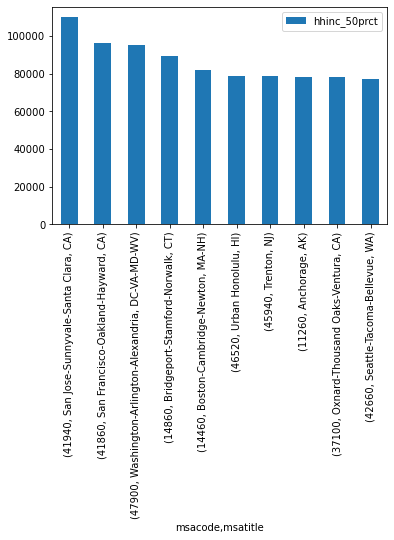

In [19]:
# default matplotlib bar chart via pandas
ax = df_top10.plot(kind='bar')

Notice that the x axis lables are the index columns

In [20]:
# what is this "ax" variable we created?
type(ax)

matplotlib.axes._subplots.AxesSubplot

In [21]:
# every matplotlib axes is associated with a "figure" which is like a container
fig = ax.get_figure()
type(fig)

matplotlib.figure.Figure

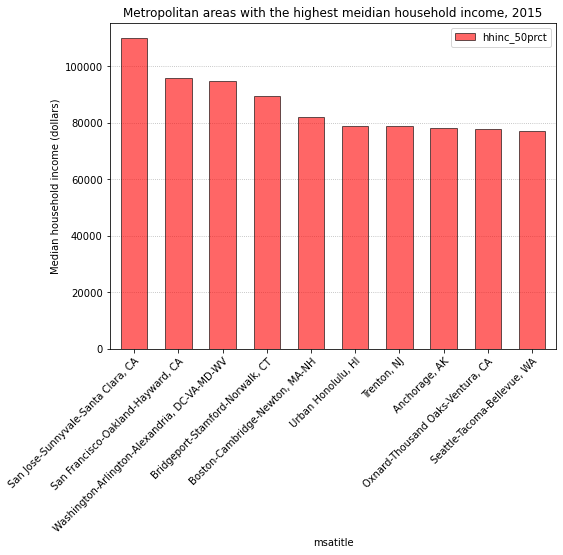

In [22]:
# let's reset the index to make the lable only shows the msatitle
df_top10 = df_top10.reset_index().set_index('msatitle')

# style the plot to make it look nicer
ax = df_top10.plot(kind='bar', figsize=(8, 6), width=0.6, alpha=0.6, 
                 color='red', edgecolor='k', zorder=2)

ax.yaxis.grid(True, ls=':')
ax.set_xticklabels(df_top10.index, rotation=45, rotation_mode='anchor', ha='right')

ax.set_title('Metropolitan areas with the highest meidian household income, 2015')
ax.set_ylabel('Median household income (dollars)')

plt.show()

There is not space in this notebook to give a comprehensive overview of functionality in matplotlib. The [matplotlib gallery and documentation](https://matplotlib.org/) are the best resource for learning advanced features.  

We are going to focus on seaborn for more visualization in the following module.

Text(0, 0.5, 'MSA name')

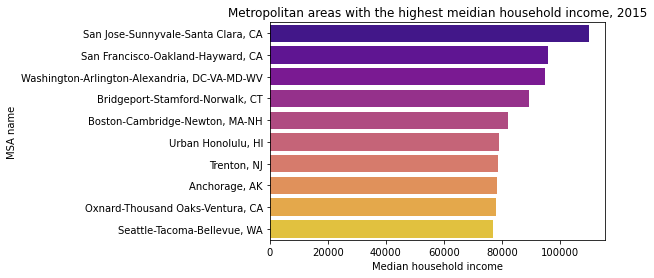

In [23]:
# nicer bar plot sorted by median value using seaborn
ax = sns.barplot(y=df_top10.index, x= df_top10['hhinc_50prct'], palette='plasma')

# set x/y labels, and save figure
ax.set_title('Metropolitan areas with the highest meidian household income, 2015')
ax.set_xlabel('Median household income')
ax.set_ylabel('MSA name')

## Q3: Let's see how the income inequality change over time 

### Line plots

Line plots are most commonly used to visualize time series: how one or more variables change over time. 

In [24]:
# let's calculate the average income ratio gaps by year with our sample metro areas, using groupby
df_year = df.groupby('year')

# what is the average 90/10 across MSAs each year?
df_year[['hhinc_90_10']].mean()

,hhinc_90_10
year,
2005,10.498608
2006,10.417304
2007,10.367397
2008,10.682543
2009,10.946317
2010,11.359428
2011,11.313366
2012,11.406926
2013,11.293881


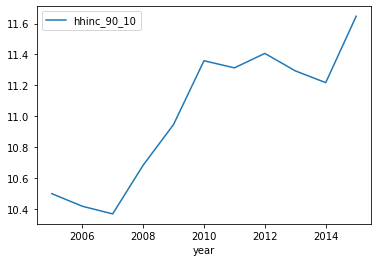

In [25]:
df_gap = df_year[['hhinc_90_10']].mean()

# simple line plot
# seaborn uses the index as x-axis and individual lines for each column
ax = sns.lineplot(data=df_gap)

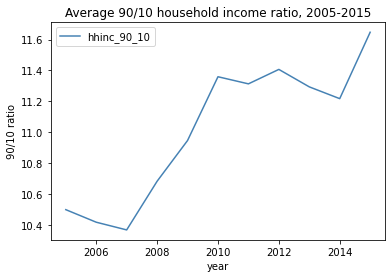

In [26]:
# same thing again, but styled more nicely
ax = sns.lineplot(data=df_gap,
                  dashes=False, palette=['steelblue'])

ax.set_xlabel('year')
ax.set_ylabel('90/10 ratio')
ax.set_title('Average 90/10 household income ratio, 2005-2015')
ax.get_figure().savefig('msa-incomegap-lineplot.png', dpi=600, bbox_inches='tight')

In [27]:
# we could also plot multiple columns in a line plot
# let's look at how the top and bottom household income percentile changes over time compare to the base year 2005
df_inc = df_year[['hhinc_90prct', 'hhinc_50prct', 'hhinc_10prct']].mean()

# we first need to do some calculation to measure the percent change of household income percentile each year from 2005
for x in ['hhinc_90prct', 'hhinc_50prct', 'hhinc_10prct']: 
    df_inc[x] = (df_inc[x]  - df_inc.loc[2005][x])/df_inc.loc[2005][x]


Text(0.5, 1, 'Percent change (current year - year 2005) of average income distribution \n in 90, 50, 10 percentile in selected metro areas')

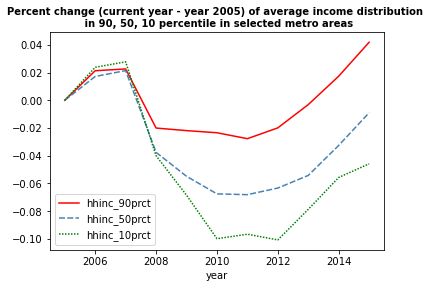

In [28]:
# now let's plot the percent change of household income percentile over time
# same thing again, but styled more nicely
ax = sns.lineplot(data=df_inc, palette=['red', 'steelblue', 'green'])

ax.set_xlabel('year')
ax.set_ylabel('')
ax.set_title('Percent change (current year - year 2005) of average income distribution \n in 90, 50, 10 percentile in selected metro areas', y=1, fontsize=10, weight='bold')
#ax.get_figure().savefig('msa-incomegap-lineplot.png', dpi=600, bbox_inches='tight')

What can you tell from this graph in terms of the change of household income at the top 90th and bottom 10th percentile?  

With the graph above, can you answer the question how the income inequality change over time from 2005 to 2015?

### Histograms and KDE plots

Histograms visualize the distribution of some variable by binning it then counting observations per bin. KDE plots are similar, but continuous and smooth.

/Users/shirley/Anaconda/miniconda3/envs/ppua6202/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


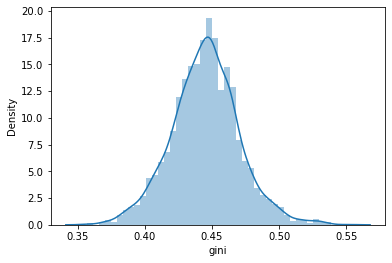

In [29]:
# distplot visualizes the variable's distribution as both histogram and kde
ax = sns.distplot(df['gini'].dropna())

/Users/shirley/Anaconda/miniconda3/envs/ppua6202/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


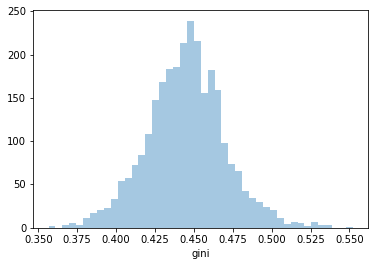

In [30]:
# if you prefer, you can plot just the histogram alone
ax = sns.distplot(df['gini'].dropna(), kde=False)

You can compare multiple histograms to see how different groups overlap or differ by some measure.

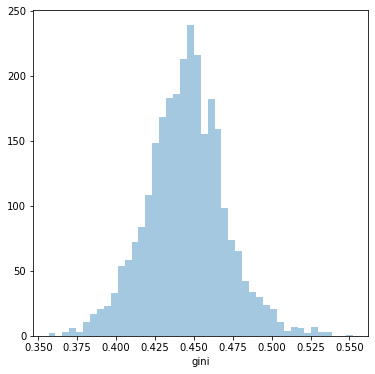

In [31]:
# manually change the plot's size/dimension by adjusting its figure's size
fig = ax.get_figure()
fig.set_size_inches(6, 6) #inches
fig

It's usually better to let seaborn intelligently handle the figure size for you. But you can easily configure its style, plotting context, and many attributes of the plot:

In [32]:
# subset the dataframe into large and small metropolitan areas
df_lar_msa = df[df['tot_pop'] > 1000000]
df_sml_msa = df[df['tot_pop'] < 1000000]

/Users/shirley/Anaconda/miniconda3/envs/ppua6202/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shirley/Anaconda/miniconda3/envs/ppua6202/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


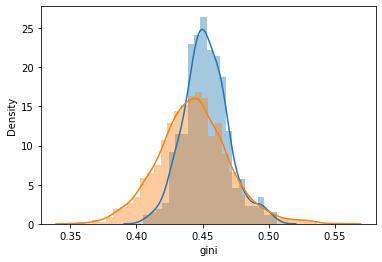

In [33]:
# compare their distributions to each other
ax = sns.distplot(df_lar_msa['gini'].dropna())
ax = sns.distplot(df_sml_msa['gini'].dropna())

/Users/shirley/Anaconda/miniconda3/envs/ppua6202/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/shirley/Anaconda/miniconda3/envs/ppua6202/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


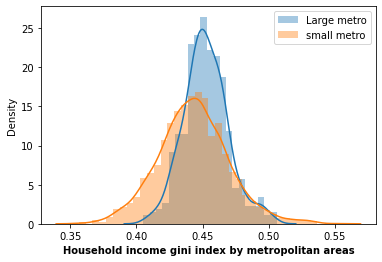

In [34]:
# improve the aesthetics: label each distribution and create a legend
ax = sns.distplot(df_lar_msa['gini'].dropna(), label='Large metro')
ax = sns.distplot(df_sml_msa['gini'].dropna(), label='small metro')
ax.legend()

# add x-label, then save to disk
ax.set_xlabel('Household income gini index by metropolitan areas', weight='bold')
ax.get_figure().savefig('figure-gini-distributions.png', dpi=600, bbox_inches='tight')

**So, what does this plot tell us?**

It looks like the two groups differ... but it is a big enough difference to make meaningful claims about it? We will revisit this question when we discuss statistical significance in a few weeks.

### Scatter plots

Histograms and box plots visualize univariate distributions: how a single variable's values are distributed. Scatter plots essentially visualize *bivariate* distributions so that we can see patterns and trends jointly between two variables.

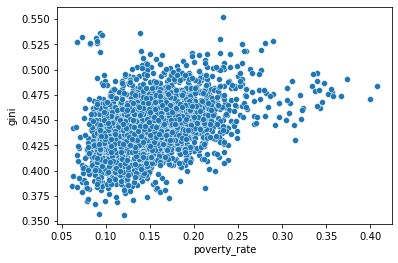

In [35]:
# use seaborn to scatter-plot two variables
ax = sns.scatterplot(x=df['poverty_rate'], y=df['gini'])

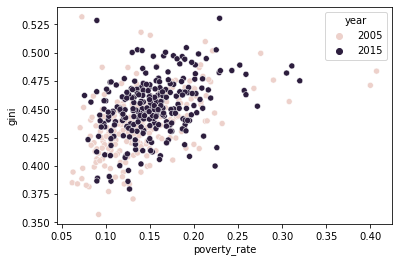

In [36]:
# scatter-plot two variables, broken out across different years by color
year = [2005, 2015]
df = df.reset_index()
df_msa = df[df['year'].isin(year)]
ax = sns.scatterplot(x=df_msa['poverty_rate'], y=df_msa['gini'], hue=df_msa['year'])

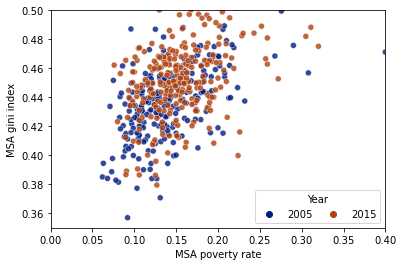

In [37]:
# same thing again, but styled more nicely
year = [2005, 2015]
df_msa = df[df['year'].isin(year)]
ax = sns.scatterplot(x=df_msa['poverty_rate'],
                     y=df_msa['gini'],
                     hue=df_msa['year'], palette="dark", alpha=0.8)

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title="Year", columnspacing=1, loc="lower right", ncol=2, frameon=True)

# set x/y limits, labels, and save figure
ax.set_xlim(0, 0.4)
ax.set_ylim(0.35, 0.5)
ax.set_xlabel('MSA poverty rate')
ax.set_ylabel('MSA gini index')
ax.get_figure().savefig('figure-gini-poverty.png', dpi=600, bbox_inches='tight')

## 7. Working with color

Seaborn makes generally smart decisions about color for you. But you can tweak the colors in your plot usually by passing in a `palette` argument (the name of a colormap or a list of colors to use).

How seaborn handles color: https://seaborn.pydata.org/tutorial/color_palettes.html

Available color maps: https://matplotlib.org/tutorials/colors/colormaps.html

Available named colors: https://matplotlib.org/gallery/color/named_colors.html

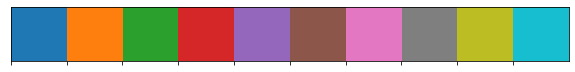

In [38]:
# show the default color palette
sns.palplot(sns.color_palette())

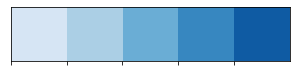

In [39]:
# show the "Blues" color map as a palette
sns.palplot(sns.color_palette('Blues', n_colors=5))

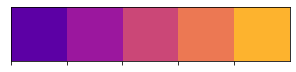

In [40]:
# show the "plasma" color map as a palette
# notice that color map names are case sensitive
sns.palplot(sns.color_palette('plasma', n_colors=5))

In [41]:
# now it's your turn
# go back through a couple of the plots earlier in this notebook and adjust their colors
# try both colormaps and lists of color names: look up both using the links above


## Summary
1. Basic descriptive statistics using pandas
2. visualization
    - Bar chart
    - Line plot
    - Histogram and KDE
    - Scatter plot
    

## Assignment 4

See instrutions on Canvas